## **El Gradiente Descendente**

**Nombre:** Santiago Castro\
**Programa Académico:** Ingeniería de Sistemas

---

##### _**¿Qué es el gradiente descendente?**_

&emsp; El **gradiente descendente** es un algoritmo de automatización ampliamente utilizado en los campos de la ingeniería siendo particularmente recurrente en aplicaciones de **machine learning** o **deep learning**, buscando reducir el error a la hora de responder, resolver o inclusive predecir soluciones, respecto a algún problema determinado.\
De esta manera, al momento de plantearse soluciones de **inteligencia artificial** (o IA), se aplica esta técnica en el uso de **redes neuronales**, buscando el entrenamiento y aprendizaje acelerado de las mismas, contrario al método usado hace tan solo algunas décadas que solo se basaba en el azar al ajustar los coeficientes de las neuronas.\
&emsp; Veamos un ejemplo sencillo, si quisiéramos entrenar una **red neuronal** a identificar y separar dos grupos diferentes en una imagen, considerando colores, ubicaciones en la imagen, figuras, entre otros factores, ¿como la entrenaríamos?\
Realmente esta pregunta es difícil de responder solo imaginándonos la situación, pero el objetivo es quedarse con el concepto. La idea consiste en buscar reducir el error promedio al momento de dividir la imagen en 2 grupos, lo cual puede ser interpretado como una **función de coste**, y así mismo poner en ejecución el algoritmo buscando el **valor mínimo del coste o error promedio**, encontrando de forma efectiva, tal vez no perfecta, una válida respuesta al problema planteado.

##### _**Fundamentos matemáticos de cálculo vectorial:**_

&emsp; Para adentrarnos en la explicación teórico matemática del algoritmo, debemos primero entender conceptos base que son fundamentales para continuar.
- Primeramente, el **Vector Gradiente** $\nabla f$ (ejemplo para $R^2$):
    $$
        \nabla f(x, y) = [f_x(x,y), f_y(x,y)] = \biggr[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\biggr]
    $$
    El vector gradiente $\nabla f$ es un vector que apunta hacia la dirección donde la función $f$ crece más rápido. En nuestro contexto, buscamos el vector que apunte hacia la dirección de menor aumento de la función, es decir todo lo contrario a la dirección original, por eso se usa el vector con sentido opuesto al vector gradiente: $-\nabla f$\
    <br>
    
- **Valores críticos** de las funciones:\
    Los valores críticos en una función son aquellos en los que la derivada es igual a 0:
    $$
        En \space R^2: f' = \frac{df}{dx} = 0,\quad \quad
        En \space R^3: \frac{\partial f}{\partial x} = \frac{\partial f}{\partial y} = 0
    $$
    Más precisamente, los valores denominados como **mínimos**, **máximos** y los **puntos de silla**, tantos **locales** como **absolutos**.
    
    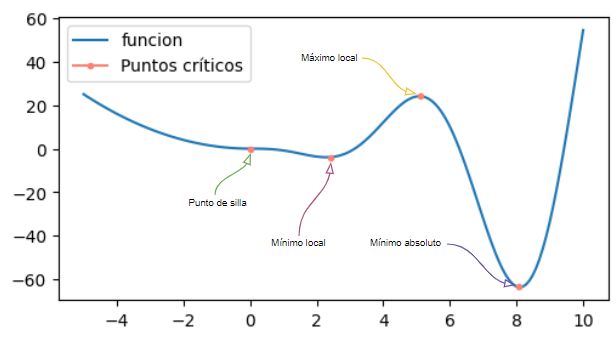
    
    **Figura 1.** Ejemplo puntos críticos en $R^2$

##### _**Explicación matemática del algoritmo del gradiente descendente:**_

&emsp;El algoritmo, de nuevo, busca encontrar el valor mínimo de una función. Para los ejemplos ya tomados en cuenta puede parecer sencillo, pero la cosa se complica cuando entramos en **espacios vectoriales más grandes y complejos**.

&emsp;En un espacio vectorial de mayor dimensión es realmente más complejo llegar a visualizar los conceptos, así que lo implementaremos con un ejemplo breve:

Imaginémonos un terreno con dunas, montañas y desniveles, en el cuál está lloviendo. Como bien sabemos una gota de agua tiende a quedarse o estancarse en lo más bajo del terreno posible. Es decir, se desliza por el terreno hasta estabilizarse. Si visualizamos el comportamiento de una gota, poco a poco va a irse cayendo o lo que también equivale a que su altura tiende a reducirse.

Pongamos el escenario en práctica:
- Consideremos un terreno expresado por una función $f$ dada por la siguiente ecuación:
    $$
        f(x,y) = \sin(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3)\cos(2x + 1 - e^y)
    $$

- La siguiente figura podría ser una posible representación:

    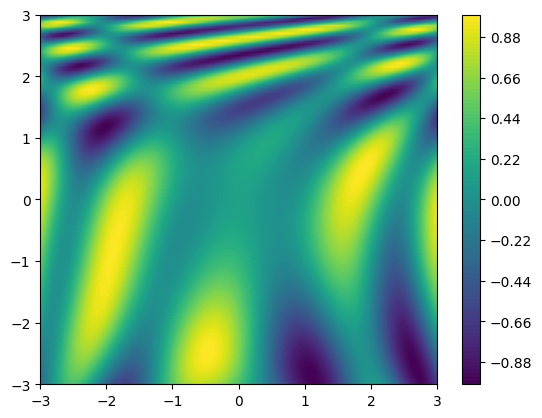

    **Figura 2.** Representación de la función $f$ como mapa de colores

    Aquí mismo, observamos las deformaciones en el terreno, donde los colores modelan las diferencias de altura, como se muestra en la leyenda

- Suponiendo que una gota de agua cae en la posición $(0,-1)$, podría simularse su comportamiento con el gradiente descendente y este es el resultado:

    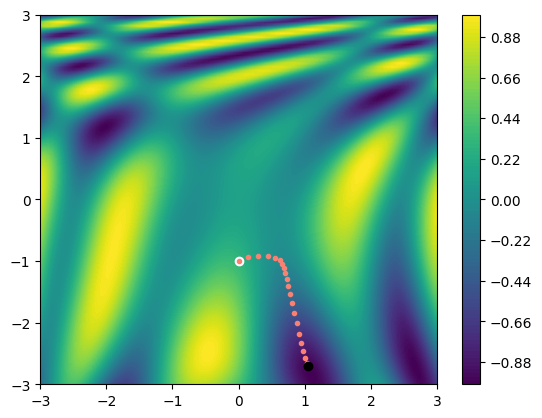
    
    **Figura 3.** Simulación del algoritmo desde el punto $(0,-1)$

    En la figura, el punto *blanco* equivale al **punto de inicio**, los *naranjas* son la **trayectoria de desplazamiento** y el *negro* corresponde al **punto final**.

*¿Como se obtuvo este resultado?*

- Para responder a esta pregunta, toca tener en cuenta que este algoritmo es **itertivo**, es decir, se escoge un valor $n$ que representa el **número de veces** que se ejecutará el algoritmo, por esta razón, se observa el desplazamiento de la gota en el terreno.
- También, es necesario calcular el vector gradiente de la función $f$ que equivaldría a:
    $$
        \left\{
        \frac{\partial f}{\partial x} = -2\sin(2x + 1 + e^y)\sin(\frac{x^2}{2} - \frac{y^2}{4} + 3) + x\cos(2x + 1 + e^y)\cos(\frac{x^2}{2} - \frac{y^2}{4} + 3)\quad\atop
        \frac{\partial f}{\partial y} = -e^y\sin(2x + 1 + e^y)sin(\frac{x^2}{2} - \frac{y^2}{4} + 3) - \frac{1}{2}y\cos(2x + 1 + e^y)\cos(\frac{x^2}{2} - \frac{y^2}{4} + 3) 
        \right.\\
        \Rightarrow \nabla f(x,y) = \biggr[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\biggr]
    $$
- Por último se define un valor constante denominado la **tasa de aprendizaje $lr$** (o learning rate en inglés) que determina cuán rápido la gota se desliza por la colina (en el ejemplo se usó $0.005$ como valor). Este valor es muy importante para que el algoritmo converja a un punto, si el valor es muy grande, podría parecer que el algoritmo se vuelve loco (hasta el punto de salirse del dominio graficado), y si el valor es mínimo, el gradiente descendente se vuelve muy ineficiente al aplicarlo.

    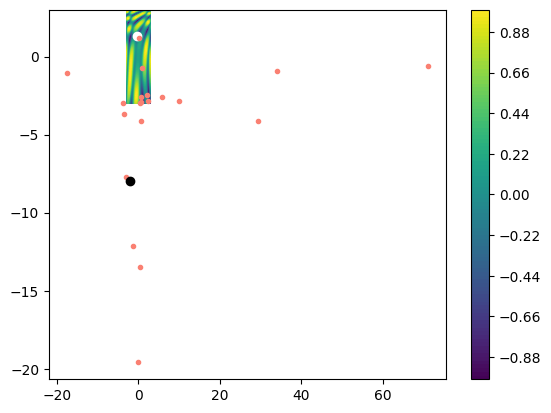

    **Figura 4.** Simulación del algoritmo con $lr = 1$

Con lo anterior, ya se puede comenzar a iterar el algoritmo.

Antes de iniciar el algoritmo, generamos un punto $P_0$ aleatorio (en la gráfica se empezó con $P_0=(0,-1)$). A continación se calcula el vector gradiente en ese punto $\nabla f(P_0)$, y se calcula el siguiente valor de la sucesión restando el valor del gradiente calculado y multiplicado por la tasa de apredizaje, es decir: $P_1 = P_0 - \nabla f(P_0)ls$, o generalizado para la $késima$ iteración:
$$
    P_{k+1} = P_k - \nabla f(P_k)ls
$$
&emsp;De esta manera, el algoritmo tendería a acercarse a un valor **mínimo local** pero no necesariamente al **mínimo absoluto**, debido a que la iteración no verifica todos los mínimos locales existentes en la función.

##### _**Aplicación práctica del algoritmo**_

&emsp;A pesar de esta limitación, es uno de los algoritmos más eficientes en la búsqueda de mínimos en funciones de varias variables, y su aplicación ha permitido mejorar el desarrollo en **machine learning** e **inteligencia artificial**.

Para ilustrar este avance, desarrollaremos una red neuronal en la que el método de aprendizaje se realizará a partir del gradiente descente, mediante la técnica de **backpropagation**.
Esta técnica le permite al programa mismo ajustar los coeficientes de cada una de las neuronas, según la corrección calculada del error previo cometido.

La implementación de la red neuronal se hará a partir de un escenario de ejemplo que busca identificar y separa 2 nubes de datos encerrando cada una de ellas.

He aquí el código desarrollado:

In [1]:
# --- Librerías --- #
from dataclasses import dataclass
from typing import Callable

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc


from sklearn.datasets import make_circles

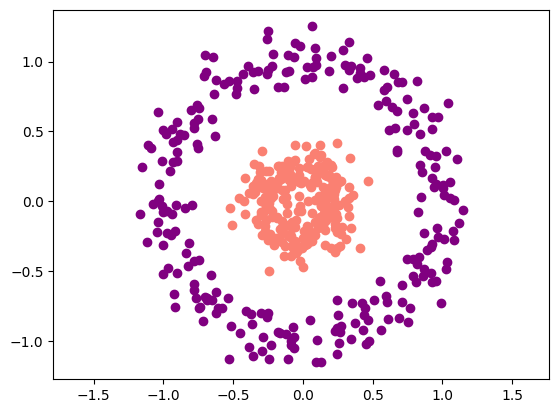

In [2]:
# --- Dataset --- #

n = 500 # tamaño del dataset 
p = 2 # número de atributos que contiene un punto. (Al estar en R2, las coordenadas X y Y)

X, Y = make_circles(n_samples=n, factor=0.25, noise=0.1)
# el parámetro 'factor' separa las dispersiones de puntos.
# el parámetro 'noise' es el indice de disperción de los puntos en el plano.

Y = Y[:, np.newaxis] #Esta linea cambia la estructura del vector de salida.

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="purple")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

_**¿Qué es una neurona?**_

&emsp;Es una función que encapsula un problema **regresión lineal**, es decir, una representación y aproximación de los datos mediante una línea, **una suma ponderada** $z$.\
De esta manera, la concatenación de neuronas busca resolver un ámplio repertorio de problemas, formando una **red neuronal**.

&emsp;Es en este punto en el que comienza a cobrar importancia un inconveniente, una red neuronal solo permite resolver escenarios lineales, lo que es suma mente limitado. Por esta razón, se usa una **función de activación** $a$, para fluctuar cada una de las neuronas y ampliar su capacidad individual.

&emsp;Por consiguiente, $z$ es definida por:
$$
    z = wx + b
$$
Donde $w$ es el vector de pesos de la neurona, $x$ los datos de entrada y $b$ el coeficiente de bayes

In [3]:
# --- Modelo de clases --- #

@dataclass(slots=True)
class Capa_neuronal:

    b : np.ndarray # vector de coeficientes de bayes para cada neurona
    w : np.ndarray # matríz de coeficientes de peso para cada conección con las neuronas de la fila anterior

    def __init__(self, n_conn, n_neur):
        self.b = np.random.rand(1, n_neur)*2-1
        self.w = np.random.rand(n_conn, n_neur)*2-1
    
    def borrar_coefs(self):
        self.b = np.random.rand(self.b.shape[0], self.b.shape[1])*2-1
        self.w = np.random.rand(self.w.shape[0], self.w.shape[1])*2-1

@dataclass(slots=True)
class Red_neuronal:

    capas : list[Capa_neuronal] # lista de capas de la red
    f_act : dict[str, Callable] # diccionario con la función de activación y su derivada (se usará en todas las neuronas de la red)

    def __init__(self, topologia, f_act):
        self.capas = []
        self.f_act = f_act
        
        for l in range(len(topologia[:-1])):
            self.capas.append(Capa_neuronal(topologia[l], topologia[l+1]))
    
    def borrar_coefs(self):
        for c in self.capas:
            c.borrar_coefs()

*Función de activación* _**sigmoide**_ $\sigma$*:*
$$
    \sigma(x) = \frac{1}{1 + e^{-x}}; \quad \sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2}
$$

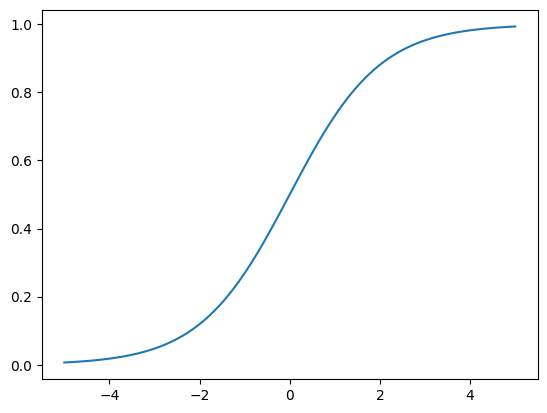

In [5]:
# --- Función de activación utilizada: función sigmoide --- #

sigm = {
    "funcion":  lambda x: 1 / (1 + np.e**(-x)),             # sigmoide
    "derivada": lambda x: np.e**(-x) / (1 + np.e**(-x))**2  # derivada de la sigmoide
}              

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm["funcion"](_x))
plt.show()

_**Togología:**_

&emsp;La topología, o distribución de la red neuronal fue elgída arbitrariamente, buscando simplemente el funcionamiento del ejerecicio.\
En este caso, hay $p=2$ valores de entrada, que corresponden a las coordenadas del punto evaluado, 4 neuronas en la 1ra capa, 8 en la 2da y la neurona de salida en la última capa.

_**Función de Costo**_ $C$

&emsp;Para cuantificar el peso del error, se declara una función de costo $C$ que se conoce como el **error cuadrático medio**:
$$
    C(Y,\hat{Y}) = MSE = \frac{1}{n}\sum^n_{i=1}(Y_i-\hat{Y}_i)^2
$$

In [6]:
# --- Inicialización de variables --- #

topologia = [p, 4, 8, 1] # topología que se utilizará

f_costo = {
    "funcion":  lambda Yp, Yr: np.mean((Yp - Yr)**2),   # función de costo
    "derivada": lambda Yp, Yr: (Yp - Yr)                # derivada de la función de costo
}

red_neuronal = Red_neuronal(topologia, sigm)

***Entrenamiento de la red neuronal***

&emsp;Según lo presentado anteriormente, el método de aprendizaje se realiza de la siguiente manera:

In [7]:
# --- Función de entrenamiento --- #

def train(red_neuronal : Red_neuronal, X : np.ndarray, Y : np.ndarray, f_cost : Callable, lr=0.5, train=True):
    out=[(X,X)] # Esta lista guarda los pares de z y a para cada capa [(z0,a0),(z1,a1),...,(zn,an)]
    
    #1. Propagación hacia adelante.
    for c in range(len(red_neuronal.capas)):
        z = np.dot(out[-1][1], red_neuronal.capas[c].w) + red_neuronal.capas[c].b
        a = red_neuronal.f_act["funcion"](z)
    
        out.append((z,a))

    #2. Backpropagation
    if train:
        delta=[]
        
        for c in reversed(range(len(red_neuronal.capas))):
            z=out[c+1][0]
            a=out[c+1][1]
        
            #Si estamos en la ultima capa
            if c == len(red_neuronal.capas) - 1:
                delta.insert(0, f_cost["derivada"](a, Y) * red_neuronal.f_act["derivada"](z))
            #Calculamos el delta en las capas previas
            else:
                delta.insert(0, np.dot(delta[0], aux_w) * red_neuronal.f_act["derivada"](z))
                
            aux_w=red_neuronal.capas[c].w.T
            #Lo guardamos en una variable auxiliar para poder modificar los valores al mismo tiempo usando el Gradiente descendente

            # Algoritmo del Gradiente Descendente : Ajuste de la matriz de pesos y el valor del vector sesgo.
            red_neuronal.capas[c].b = red_neuronal.capas[c].b - lr * np.mean(delta[0], axis=0, keepdims=True)
            red_neuronal.capas[c].w = red_neuronal.capas[c].w - lr * np.dot(out[c][1].T, delta[0])
        
    return out[-1][1]

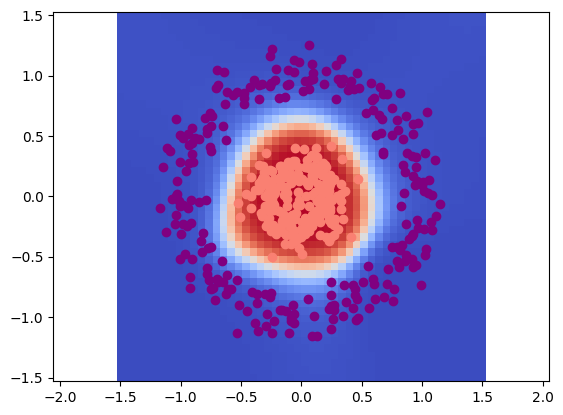

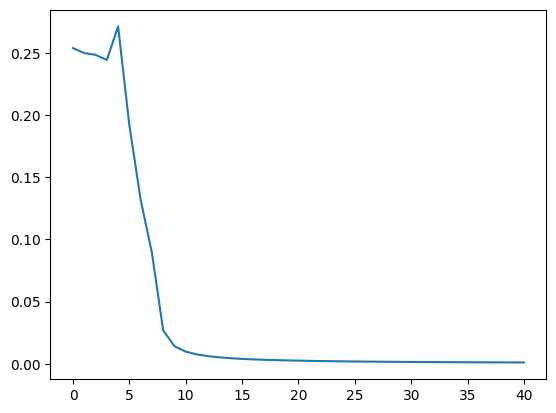

In [8]:
import time
from IPython.display import clear_output

red_neuronal.borrar_coefs() # Se borra toda la información aprendida de las pruebas ya realizadas
loss = []

for i in range(2500):
    
    #Entrenamos la red:
    pY = train(red_neuronal, X, Y, f_costo, lr = 0.045)

    if i % 25 == 0:
    
        loss.append(f_costo["funcion"](pY, Y))
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
            
        _Y = np.zeros((res, res))
            
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(red_neuronal, np.array([[x0, x1]]), Y, f_costo, train=False)[0][0]

        #Visualizamos los resultados del entrenamiento.

        plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="purple")
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")

        clear_output(wait = True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.1)

        if loss[-1] < 0.001:
            break